# Train ML_2

In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from katlas.core import *
from katlas.train import *
from katlas.plot import *
from fastbook import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [ ]:
df = pd.read_parquet('train/scaled_t5_aa.parquet')

In [ ]:
df.head()

,kinase,substrate,target,position,aa,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,...,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,HallKierAlpha,Kappa2,Kappa3,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA14,PEOE_VSA2,PEO

In [ ]:
pro_col = df.columns[5:5+1024].tolist()

aa_col =df.columns[5+1024:].tolist()

In [ ]:
# pro_col = df.columns[df.columns.str.startswith('t5_')].tolist()

# aa_col = df.columns[df.columns.str.startswith('aa_')].tolist()

In [ ]:
other_col = ['position']

feat_col = pro_col + aa_col + other_col

In [ ]:
target_col = ['target']

In [ ]:
info = Data.get_kinase_info_full()
info = info.query('in_paper ==1')
info = df[['kinase','substrate','aa','position']].merge(info,'left')

In [ ]:
info.head(2)

,kinase,substrate,aa,position,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_paper,pseudo,species_paper,uniprot_paper,range,human_uniprot_sequence,full_sequence_paper,sequence,category,category_big,cluster,length,kinasecom_domain,hdbscan
0,AAK1,-5P,P,-5,AAK1,Q2M2I8,AAK1,Other,NAK,None,NAK,1,0,human,Q2M2I8,aa27-365,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,TSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIA,NAK,NAK,18.0,339,VTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYF,3.0
1,AAK1,-4P,P,-4,AAK1,Q2M2I8,AAK1,Other,NAK,None,NAK,1,0,human,Q2M2I8,aa27-365,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAP...,TSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIA,NAK,NAK,18.0,339,VTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWA

In [ ]:
splits = get_splits(info, group='category',nfold=6)

GroupKFold(n_splits=6)
# kinase category in train set: 33
# kinase category in test set: 6
---------------------------
# kinase in train set: 253
---------------------------
# kinase in test set: 50
---------------------------
test set: ['ACVR2A' 'ACVR2B' 'ALK2' 'ALK4' 'BMPR1A' 'BMPR1B' 'CAMK1B' 'CAMK1G' 'CAMK4' 'CAMLCK' 'CDK8' 'CDK19' 'CLK1' 'CLK2' 'CLK3' 'CLK4' 'DAPK1' 'DAPK2' 'DAPK3' 'ERK1' 'ERK2' 'GSK3A' 'GSK3B' 'JNK1' 'JNK2'
 'JNK3' 'KIS' 'MYLK4' 'P38A' 'P38B' 'P38D' 'P38G' 'PHKG1' 'PHKG2' 'PKCA' 'PKCB' 'PKCD' 'PKCE' 'PKCG' 'PKCH' 'PKCI' 'PKCT' 'PKCZ' 'PKN1' 'SKMLCK' 'SMMLCK' 'SRPK1' 'SRPK2' 'SRPK3' 'TGFBR1']


In [ ]:
test_idx = splits[0][1]

In [ ]:
train_info = info.loc[splits[0][0]]

In [ ]:
train = df.loc[splits[0][0]].reset_index(drop=True)

In [ ]:
splits = get_splits(train, stratified='substrate',nfold=5)

StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
# kinase substrate in train set: 198
# kinase substrate in test set: 198
---------------------------
# kinase in train set: 252
---------------------------
# kinase in test set: 252
---------------------------
test set: ['AAK1' 'ACVR2A' 'ACVR2B' 'AKT2' 'AKT3' 'ALK4' 'ALPHAK3' 'AMPKA1' 'AMPKA2' 'ANKRD3' 'ASK1' 'ATM' 'ATR' 'BCKDK' 'BIKE' 'BMPR1A' 'BMPR1B' 'BMPR2' 'BRAF' 'BRSK1' 'BUB1' 'CAMK1A' 'CAMK1B' 'CAMK1D'
 'CAMK1G' 'CAMK2A' 'CAMK2B' 'CAMK2D' 'CAMK2G' 'CAMKK1' 'CAMKK2' 'CDC7' 'CDK1' 'CDK2' 'CDK3' 'CDK4' 'CDK5' 'CDK6' 'CDK7' 'CDK8' 'CDK12' 'CDK13' 'CDK14' 'CDK16' 'CDK18' 'CDK19' 'CDKL1' 'CDKL5' 'CHAK1'
 'CHAK2' 'CK1A' 'CK1A2' 'CK1D' 'CK1G1' 'CK1G2' 'CK1G3' 'CK2A1' 'CK2A2' 'CLK1' 'CLK2' 'CLK3' 'COT' 'CRIK' 'DAPK2' 'DAPK3' 'DLK' 'DMPK1' 'DNAPK' 'DRAK1' 'DSTYK' 'EEF2K' 'ERK1' 'ERK2' 'ERK5' 'ERK7'
 'FAM20C' 'GAK' 'GCN2' 'GRK1' 'GRK2' 'GRK3' 'GRK4' 'GRK5' 'GSK3A' 'GSK3B' 'HASPIN' 'HRI' 'ICK' 'IKKA' 'IKKB' 'IKKE' 'IRAK1' 'IRAK4' '

In [ ]:
y = train[target_col]

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 1, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(39916, 1097) (39916, 1) (9980, 1097) (9980, 1)
Int64Index([    1,     7,    15,    17,    27,    31,    32,    33,    54,
               56,
            ...
            49848, 49850, 49856, 49859, 49863, 49874, 49889, 49891, 49892,
            49895],
           dtype='int64', length=9980)
[0]	train-rmse:1.33645	valid-rmse:1.25124
[100]	train-rmse:1.26677	valid-rmse:1.19587
[200]	train-rmse:1.20435	valid-rmse:1.14774
[300]	train-rmse:1.14926	valid-rmse:1.10608
[400]	train-rmse:1.10112	valid-rmse:1.07012
[500]	train-rmse:1.05860	valid-rmse:1.03952
[600]	train-rmse:1.02000	valid-rmse:1.01283
[700]	train-rmse:0.98598	valid-rmse:0.98986
[800]	train-rmse:0.95574	valid-rmse:0.96978
[900]	train-rmse:0.92849	valid-rmse:0.95218
[1000]	train-rmse:0.90422	valid-rmse:0.

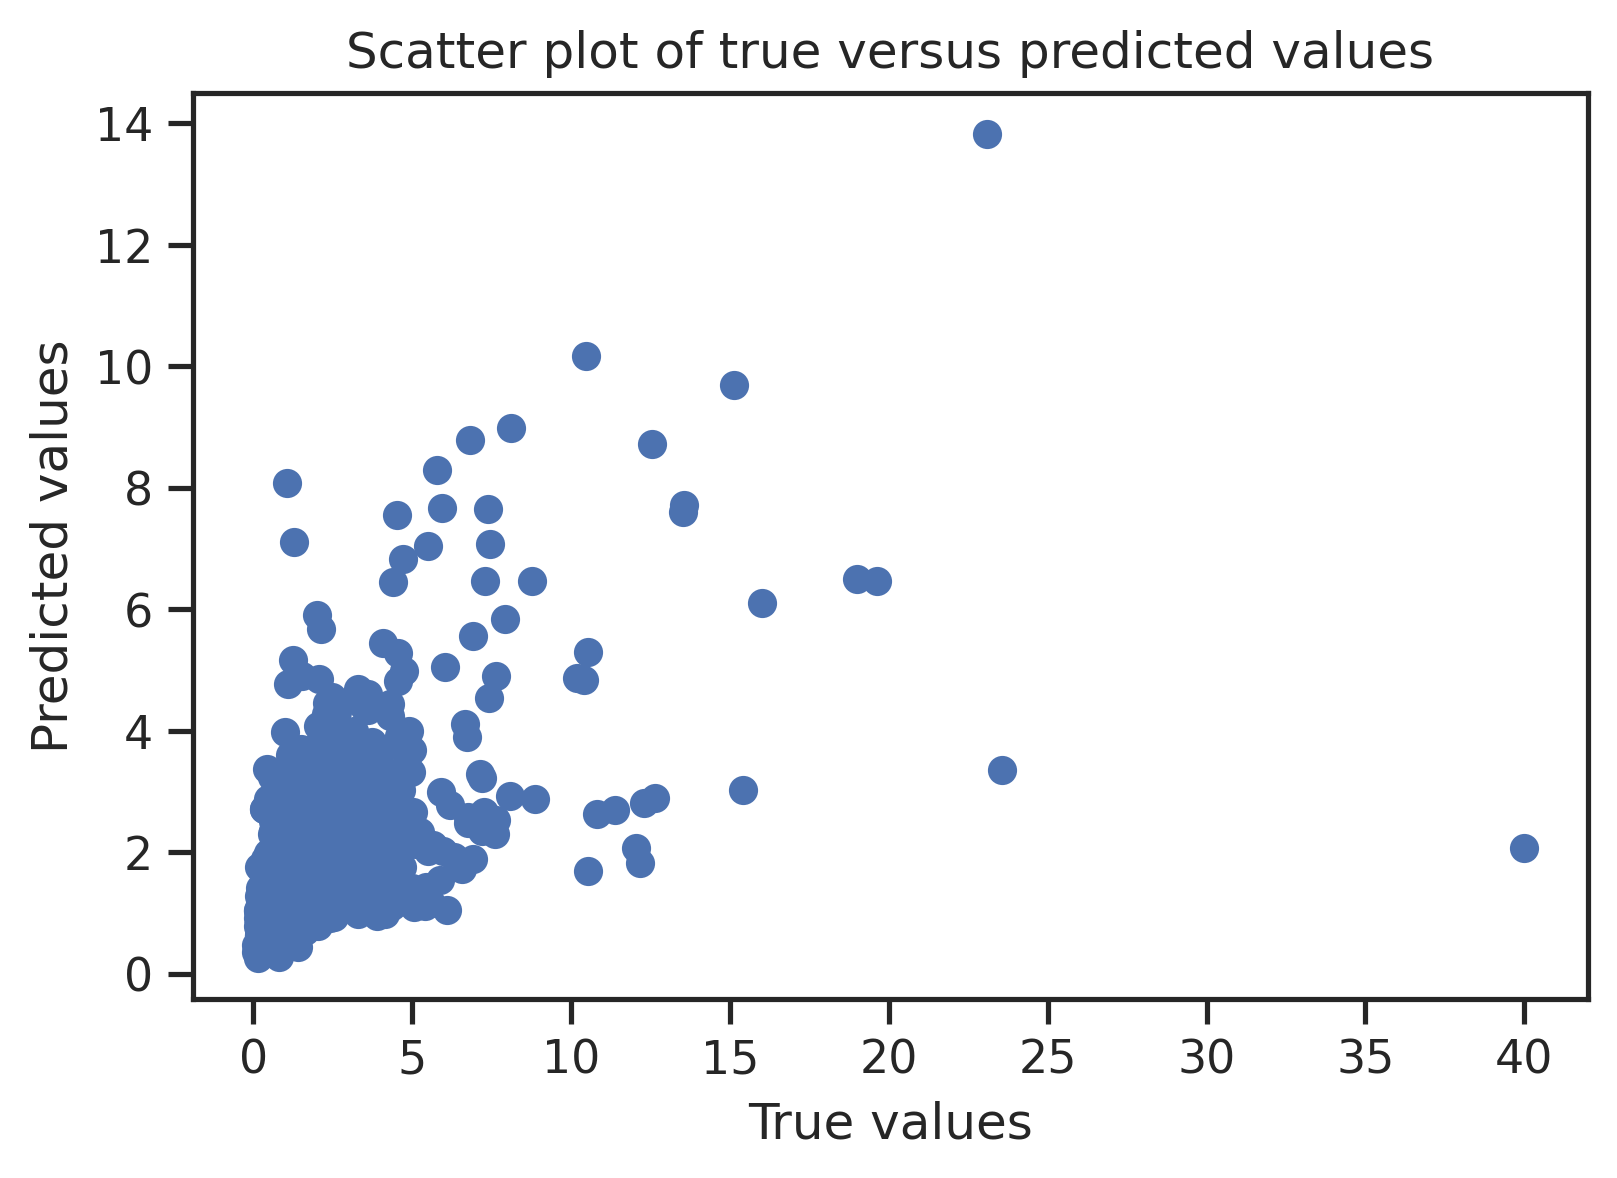

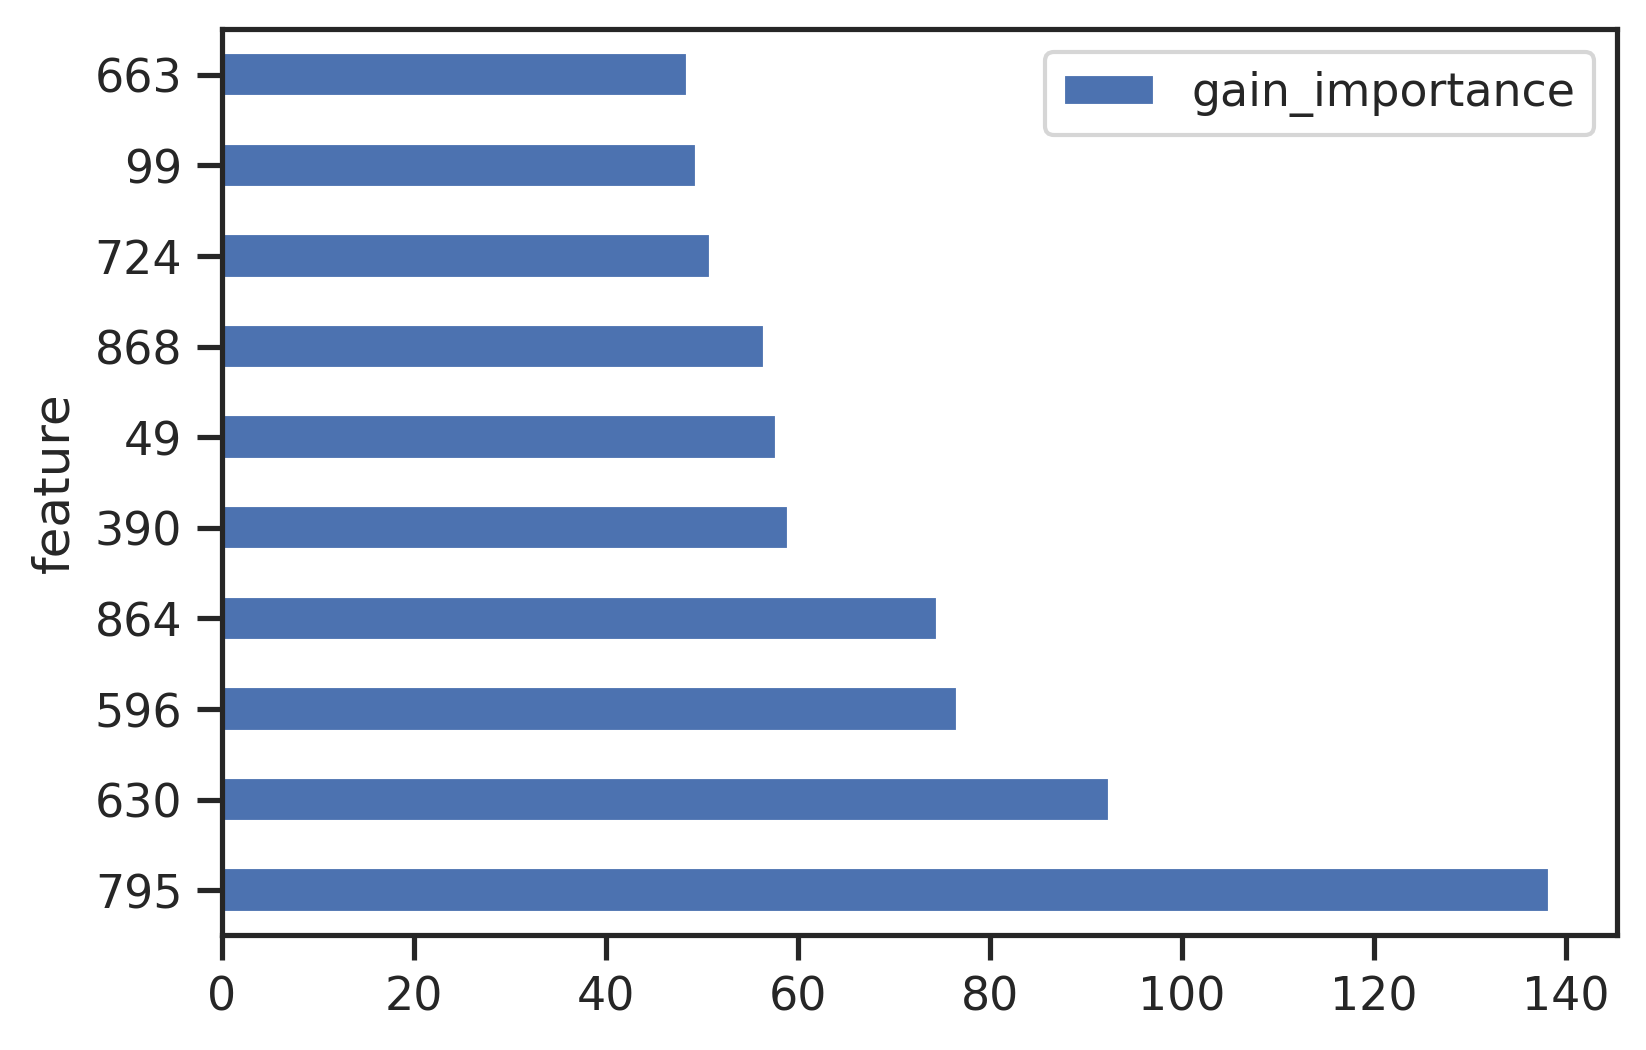

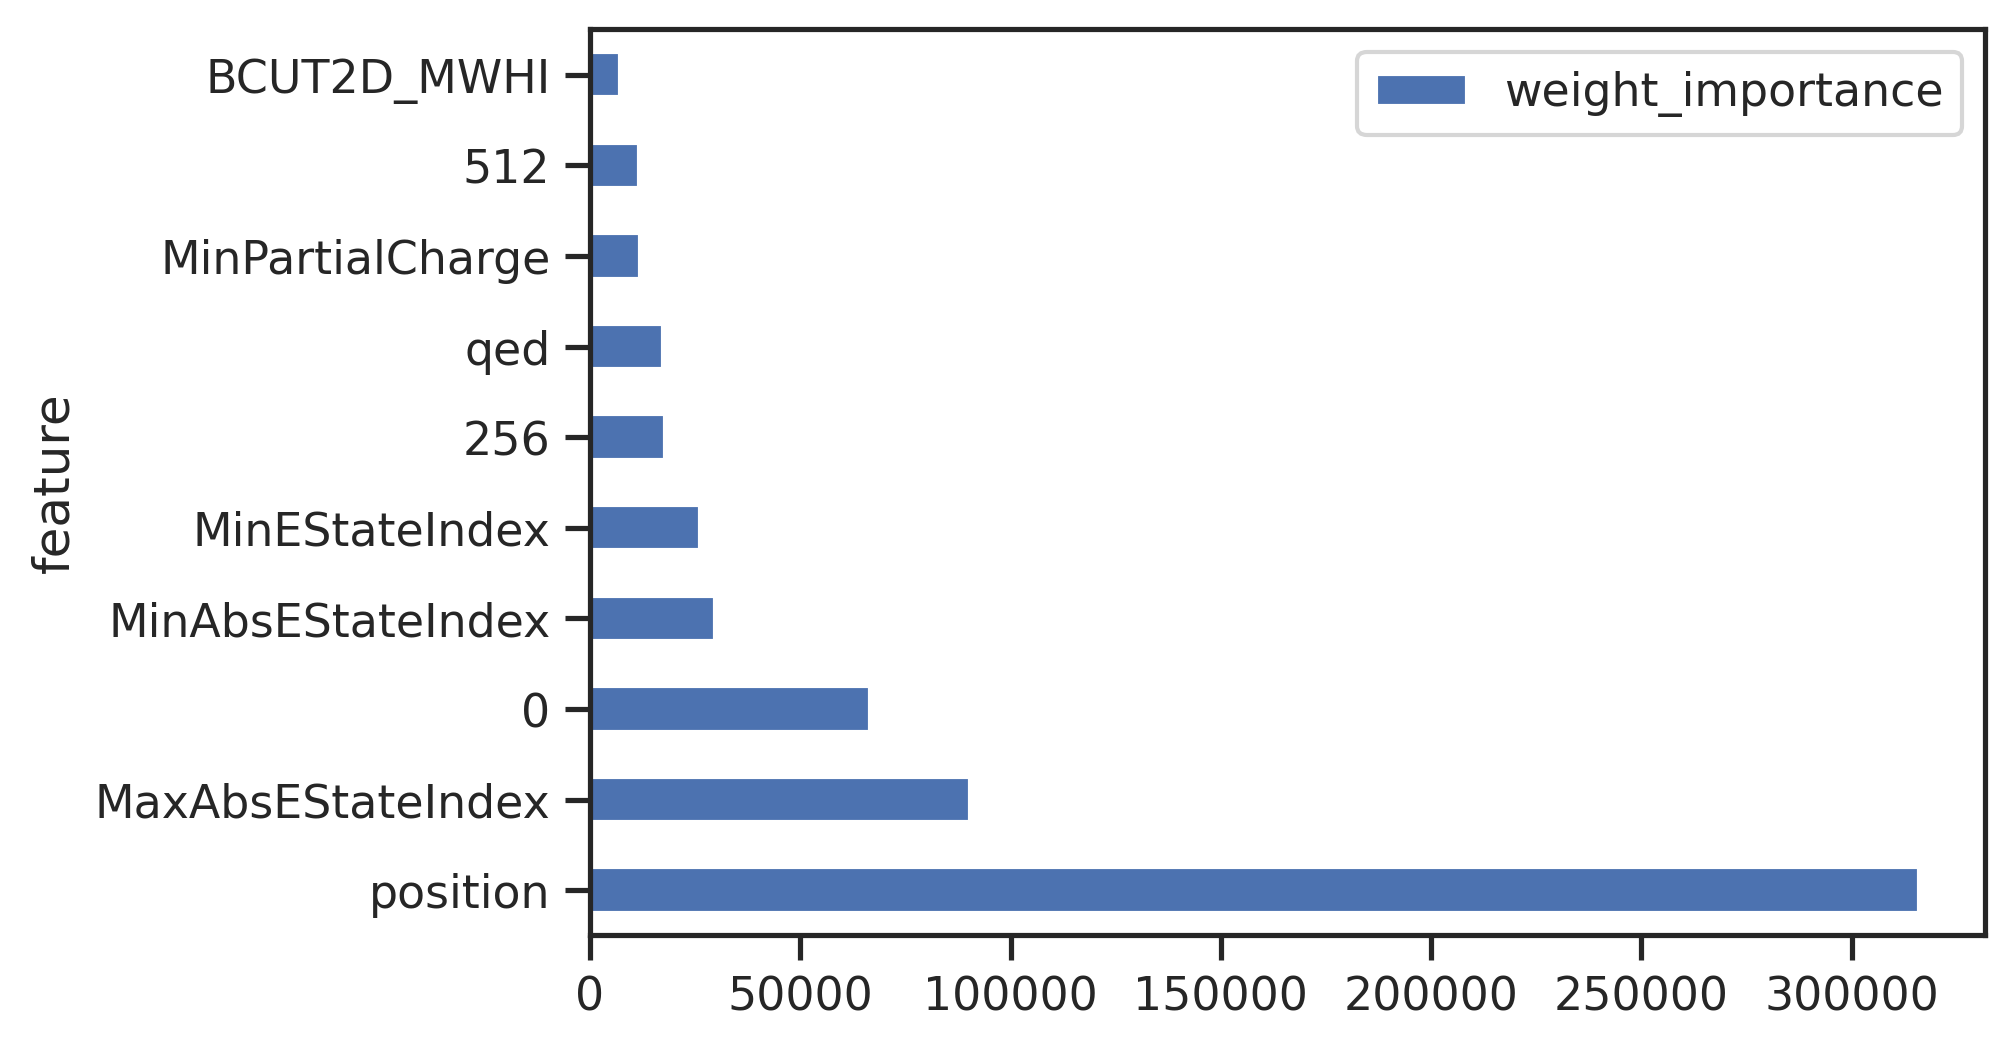

(         target      pred
 1      1.152337  1.480679
 7      1.724726  1.495314
 15     0.990975  0.776192
 17     1.350281  0.977649
 27     1.144905  1.197241
 ...         ...       ...
 49874  2.001241  5.910376
 49889  1.133772  0.979253
 49891  1.224604  0.936371
 49892  0.583405  0.797239
 49895  0.738245  0.854136
 
 [9980 rows x 2 columns],
               gain_importance
 feature                      
 795                138.390533
 630                 92.562393
 596                 76.630379
 864                 74.560379
 390                 59.047966
 ...                       ...
 SlogP_VSA4           1.927782
 FractionCSP3         1.848741
 SlogP_VSA3           1.836377
 PEOE_VSA4            1.559304
 EState_VSA6          0.903382
 
 [1085 rows x 1 columns],
                    weight_importance
 feature                             
 position                    315937.0
 MaxAbsEStateIndex            90406.0
 0                            66648.0
 MinAbsEStateIndex         

In [ ]:
xgb_trainer(train,feat_col,target_col, test_index=splits[0][1])

In [ ]:
t = df.loc[test_idx].reset_index(drop=True)

In [ ]:
pred = xgb_predict(t, feat_col,ID_col = 'kinase')

In [ ]:
pred['target'] = t.target

In [ ]:
cor = pred.groupby('kinase').corr()[::2].reset_index().drop(columns=['level_1','preds'])

In [ ]:
cor.target.mean() # without PCA

0.5449286281679381

In [ ]:
cor.target.mean() # for PCA

0.5137785670737302

In [ ]:
cor.sort_values('target')

,kinase,target
11,HGK,0.017659
46,TTBK1,0.100381
45,TNIK,0.140125
22,MINK,0.140733
41,STK33,0.203532
20,LOK,0.254114
0,AURA,0.264061
48,ULK1,0.282408
38,PLK4,0.313483
34,PAK5,0.332294


ML training

In [ ]:
models = {
    
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=0.1), # L2 regularization
    'Lasso': Lasso(0.1), # L1 regularization # changing alpha does not change the result
    'ElasticNet': ElasticNet(0.1), # Combine L1 and L2
    
    # 'SVR':SVR(C=10,gamma=1),
    'DecisionTreeRegressor': DecisionTreeRegressor(), # not very good
    'KNN': KNeighborsRegressor(n_neighbors=3), # compared with others, n=3 gives the best results
    # 'XGBRegressor': XGBRegressor(), #slow without gpu
    # 'RandomForestRegressor': RandomForestRegressor() # slow, use cuml to use gpu
                                      }

In [ ]:
for k, model in models.items():

    _,_ = train_ml(train,feat_col,target_col,splits[0],model,'model.joblib')
    pred = predict_ml(t,feat_col,'model.joblib')
    pred['target'] = t.target
    pred['kinase'] = t.kinase
    pred = pred.groupby('kinase').corr()[::2].reset_index().drop(columns=['level_1',0])
    print(f'the mean is {pred.target.mean()}')
    

LinearRegression()
the mean is 0.4330348530887582
Ridge(alpha=0.1)
the mean is 0.43303507323414236
Lasso(alpha=0.1)
the mean is 0.4117072946249528
ElasticNet(alpha=0.1)
the mean is 0.4305041439729767
DecisionTreeRegressor()
the mean is 0.2688292860328632
KNeighborsRegressor(n_neighbors=3)
the mean is 0.4425126203273329


In [ ]:
for k,model in models.items():
    print(f'------------------- start training model {k} ----------------------')
    oof = train_cv(train, feat_col, target_col, splits, model)
    
    print('----------- oof score is ------------------')
    score_all(y,oof)
    corr = score_each(y,oof)

------------------- start training model LinearRegression ----------------------
------ fold: 0 --------
LinearRegression()
mse is 1.1001
Spearman correlation coefficient: 0.2903
Pearson correlation coefficient: 0.2379 
------ fold: 1 --------
LinearRegression()
mse is 1.6406
Spearman correlation coefficient: 0.3022
Pearson correlation coefficient: 0.2219 
------ fold: 2 --------
LinearRegression()
mse is 0.6544
Spearman correlation coefficient: 0.2876
Pearson correlation coefficient: 0.2902 
------ fold: 3 --------
LinearRegression()
mse is 1.0864
Spearman correlation coefficient: 0.2854
Pearson correlation coefficient: 0.2516 
------ fold: 4 --------
LinearRegression()
mse is 1.1576
Spearman correlation coefficient: 0.3093
Pearson correlation coefficient: 0.2316 
----------- oof score is ------------------
mse is 1.1278
Spearman correlation coefficient: 0.2944
Pearson correlation coefficient: 0.2408 
average spearman for each row is nan
average pearson for each row is nan
-----------

In [ ]:
score_all(y,oof)

rmse is 1.0351
Spearman correlation coefficient: 0.4700
Pearson correlation coefficient: 0.5991 


In [ ]:
cor = score_each(y,oof)

average spearman for each row is 0.4825565299995699
average pearson for each row is 0.5653459853443716


In [ ]:
cor.index=df.kinase

In [ ]:
cor.sort_values('pearson', ascending=False)

,spearman,pearson
kinase,,
PKACB,0.860801,0.979898
GRK3,0.745775,0.977140
PKACA,0.837910,0.973616
GRK2,0.799994,0.973477
CDK18,0.835130,0.973158
...,...,...
NIK,-0.021476,-0.152048
BUB1,-0.199152,-0.179121
PBK,-0.108941,-0.184603


In [ ]:
oof.index=df.kinase
y.index=df.kinase

In [ ]:
# get_logo(oof, 'PKACB')

In [ ]:
# get_logo(y, 'PKACB')

In [ ]:
# get_heatmap(oof,'PKACB')

In [ ]:
# get_heatmap(y, 'PKACB')

In [ ]:
oof

,-1A,-1C,-1D,-1E,-1F,-1G,-1H,-1I,-1K,-1L,-1M,-1N,-1P,-1Q,-1R,-1S,-1T,-1V,-1W,-1Y,-1t,-1y,-2A,-2C,-2D,-2E,-2F,-2G,-2H,-2I,-2K,-2L,-2M,-2N,-2P,-2Q,-2R,-2S,-2T,-2V,-2W,-2Y,-2t,-2y,-3A,-3C,-3D,-3E,-3F,-3G,-3H,-3I,-3K,-3L,-3M,-3N,-3P,-3Q,-3R,-3S,-3T,-3V,-3W,-3Y,-3t,-3y,-4A,-4C,-4D,-4E,-4F,-4G,-4H,-4I,-4K,-4L,-4M,-4N,-4P,-4Q,-4R,-4S,-4T,-4V,-4W,-4Y,-4t,-4y,-5A,-5C,-5D,-5E,-5F,-5G,-5H,-5I,-5K,-5L,-5M,-5N,-5P,-5Q,-5R,-5S,-5T,-5V,-5W,-5Y,-5t,-5y,1A,1C,1D,1E,1F,1G,1H,1I,1K,1L,1M,1N,1P,1Q,1R,1S,1T,1V,1W,1Y,1t,1y,2A,2C,2D,2E,2F,2G,2H,2I,2K,2L,2M,2N,2P,2Q,2R,2S,2T,2V,2W,2Y,2t,2y,3A,3C,3D,3E,3F,3G,3H,3I,3K,3L,3M,3N,3P,3Q,3R,3S,3T,3V,3W,3Y,3t,3y,4A,4C,4D,4E,4F,4G,4H,4I,4K,4L,4M,4N,4P,4Q,4R,4S,4T,4V,4W,4Y,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAK1,0.869895,0.744021,0.882771,0.794800,1.189467,1.150626,1.524480,0.918601,2.870056,1.216927,1.361694,1.436157,1.832953,1.348895,2.021103,1.029720,1.195730,0.916813,0.903640,1.504138,0.482340,1.136043,1.053824,1.241289,1.029499,0.914363,0.932763,1.177798,1.079351,0.744335,1.128375,0.937406,1.908889,1.248839,0.704781,2.397557,2.327762,1.224340,1.690271,0.678564,0.843944,0.817255,0.577320,0.645515,1.322549,1.227249,0.469222,0.587717,0.929482,1.643903,0.806175,1.113114,1.152590,1.029151,1.602874,1.144718,2.050779,0.989869,-1.122814,1.480687,1.445704,0.872652,0.695045,0.763447,0.188381,1.429271,1.141978,1.072710,0.840475,1.125355,0.819679,1.528762,1.005626,0.945736,1.383891,0.991871,1.030512,1.000544,1.555566,1.095211,1.088942,1.069804,1.309273,1.036907,0.998259,0.943469,1.155021,1.017139,0.822960,1.248257,0.674511,0.650680,0.793539,0.966754,0.751705,1.796753,0.783334,1.190480,1.079250,0.781786,1.459577,1.011956,1.816796,1.023234,0.978282,1.297576,0.941297,1.717225,0.491131,1.077403,0.493297,0.644893,0.928958,1.203831,0.656305,12.454674,0.482363,0.559661,0.979972,0.875157,0.584842,1.009049,2.348742,0.919690,1.186749,1.222139,1.678637,0.459624,0.544606,0.444107,1.326414,0.863856,1.039068,1.070346,1.794463,1.385965,0.988456,1.571295,1.309201,0.757000,0.936115,0.791347,0.881364,1.961155,1.248501,1.426566,2.073527,0.542899,3.955168,0.556172,1.299413,1.241013,1.440089,1.495137,0.922338,1.463069,1.779389,1.827260,1.010875,2.044268,1.552407,0.559424,2.619275,0.768934,0.683382,1.806521,1.480094,1.635129,2.344373,1.255717,4.696712,0.872756,0.891522,1.189265,1.415728,1.829864,1.048784,1.354350,1.456193,1.790072,1.149923,1.411469,1.394640,0.603091,1.773386,0.676357,0.861350,1.620404,1.565851,1.582965,2.185997,1.315953,2.528393,0.777885,1.672844,1.422465,4.107981,1.435967
ACVR2A,0.651205,0.789473,1.485809,1.294628,1.082285,0.633893,1.209919,0.837772,0.800313,1.414836,1.554681,1.277814,1.109149,1.068077,0.693037,0.745819,1.339576,1.128190,1.503636,1.189008,1.838234,1.871360,0.632409,1.567492,3.964940,6.124770,0.303022,0.294936,0.522312,0.787712,0.942567,0.751088,0.609042,0.850302,0.675408,0.821655,0.924564,2.039821,2.032330,0.891771,0.214437,-0.168935,1.439944,0.790927,0.815660,0.746703,1.950088,1.626117,0.877182,0.200019,0.654964,1.002686,1.082633,0.763421,0.855181,1.016160,1.176991,0.972670,2.267772,1.468191,1.126797,1.137030,0.936797,0.903108,2.602021,2.193423,0.951897,0.714752,1.702651,1.375554,1.082703,0.932954,1.129986,0.992170,0.833974,0.898606,0.787296,0.913383,1.064513,0.871593,0.893709,1.688245,1.800324,1.183419,1.584670,1.003577,1.317963,1.441150,0.817666,1.168581,1.820293,1.403928,1.056053,0.871257,0.808245,1.073354,0.722595,0.981218,0.964985,1.072377,1.072288,0.972048,1.509092,1.066218,1.445398,0.883481,1.203542,1.227030,1.452895,1.490709,0.441059,1.321858,2.056377,3.895412,0.706550,1.911231,0.846242,0.826377,0.472842,0.962838,0.659161,1.091032,1.619209,1.086519,0.779747,0.948426,1.269480,1.007825,1.064104,0.798774,3.976398,2.857798,1.009634,0.948388,1.388424,1.099549,0.827358,1.911019,1.171137,0.894193,0.779538,0.515195,0.645327,1.0087

In [ ]:
plot_corr(oof.loc['AAK1'],y.loc['AAK1'], 'predicted','target')

NameError: name 'oof' is not defined

<AxesSubplot:xlabel='AAK1', ylabel='AAK1'>

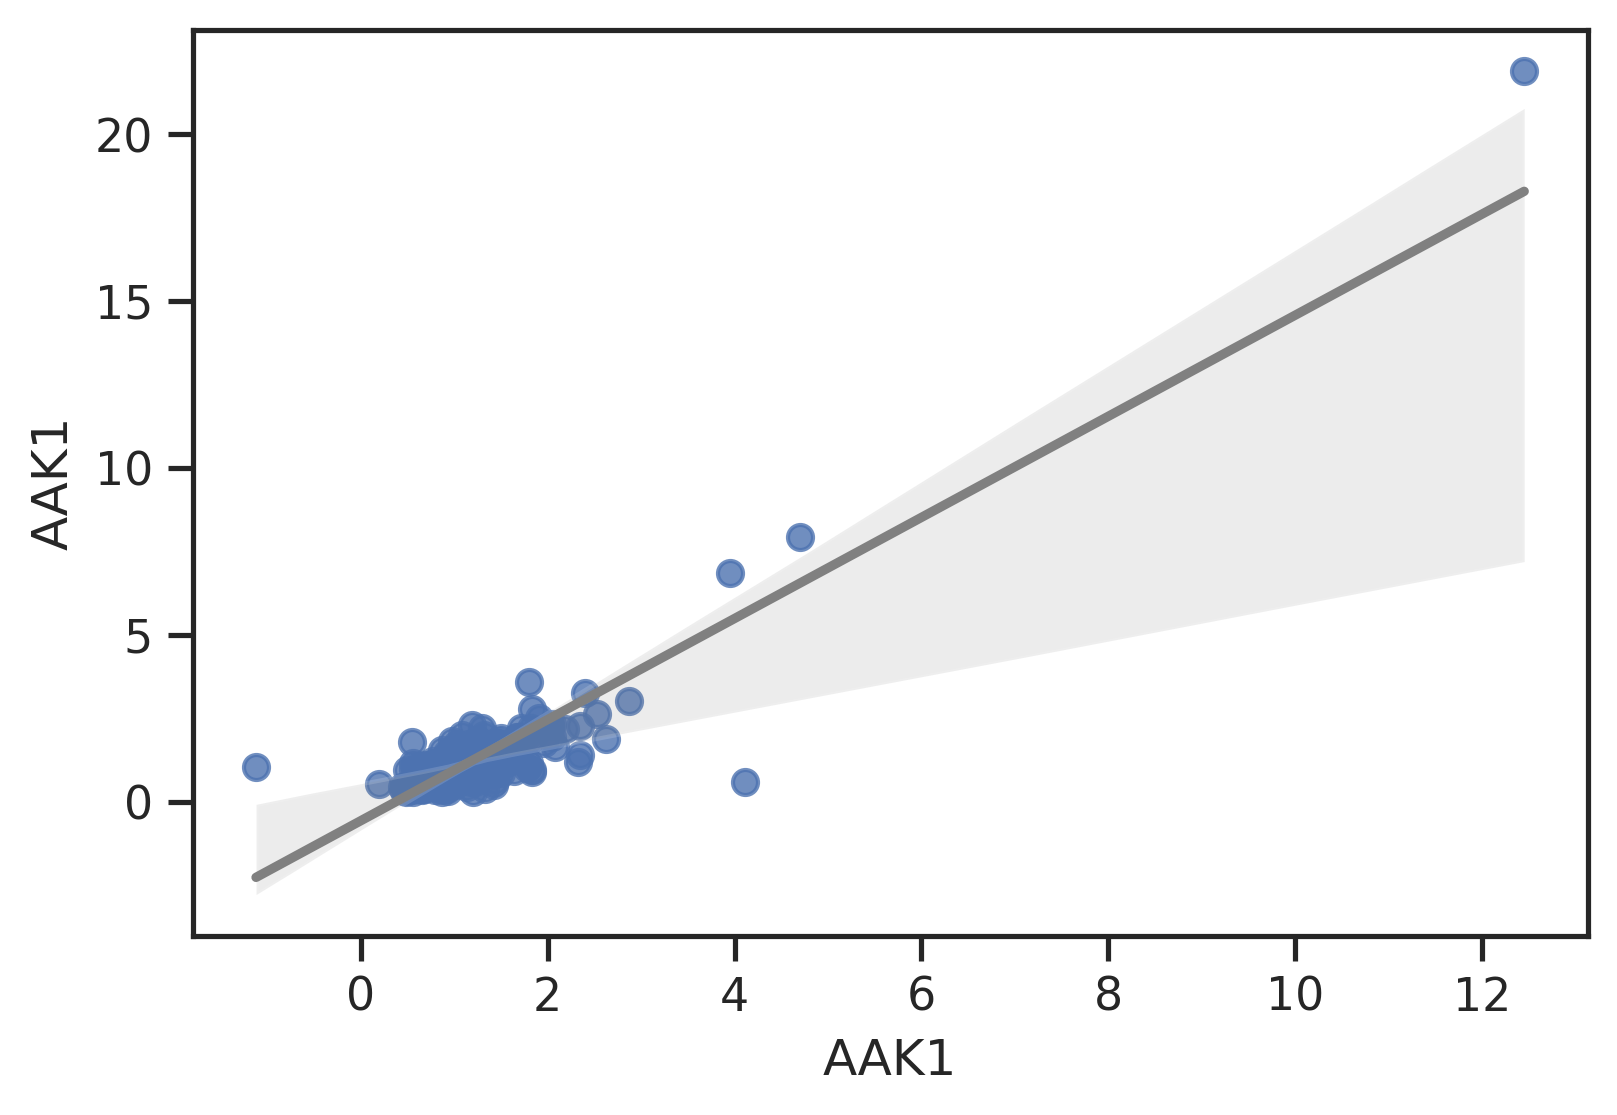

In [ ]:
sns.regplot(
            x=oof.loc['AAK1'],
            y=y.loc['AAK1'],
            # order=order,
            line_kws={'color': 'gray'}
       )

In [ ]:
us_oof = unstack(oof,'predicted')

In [ ]:
us_y = unstack(y,'target')

In [ ]:
us_oof.head(2)

,kinase,substrate,predicted,position,aa
0,AAK1,-1A,0.869895,-1,A
1,ACVR2A,-1A,0.651205,-1,A


In [ ]:
us_y.head(2)

,kinase,substrate,target,position,aa
0,AAK1,-1A,0.946369,-1,A
1,ACVR2A,-1A,0.817853,-1,A


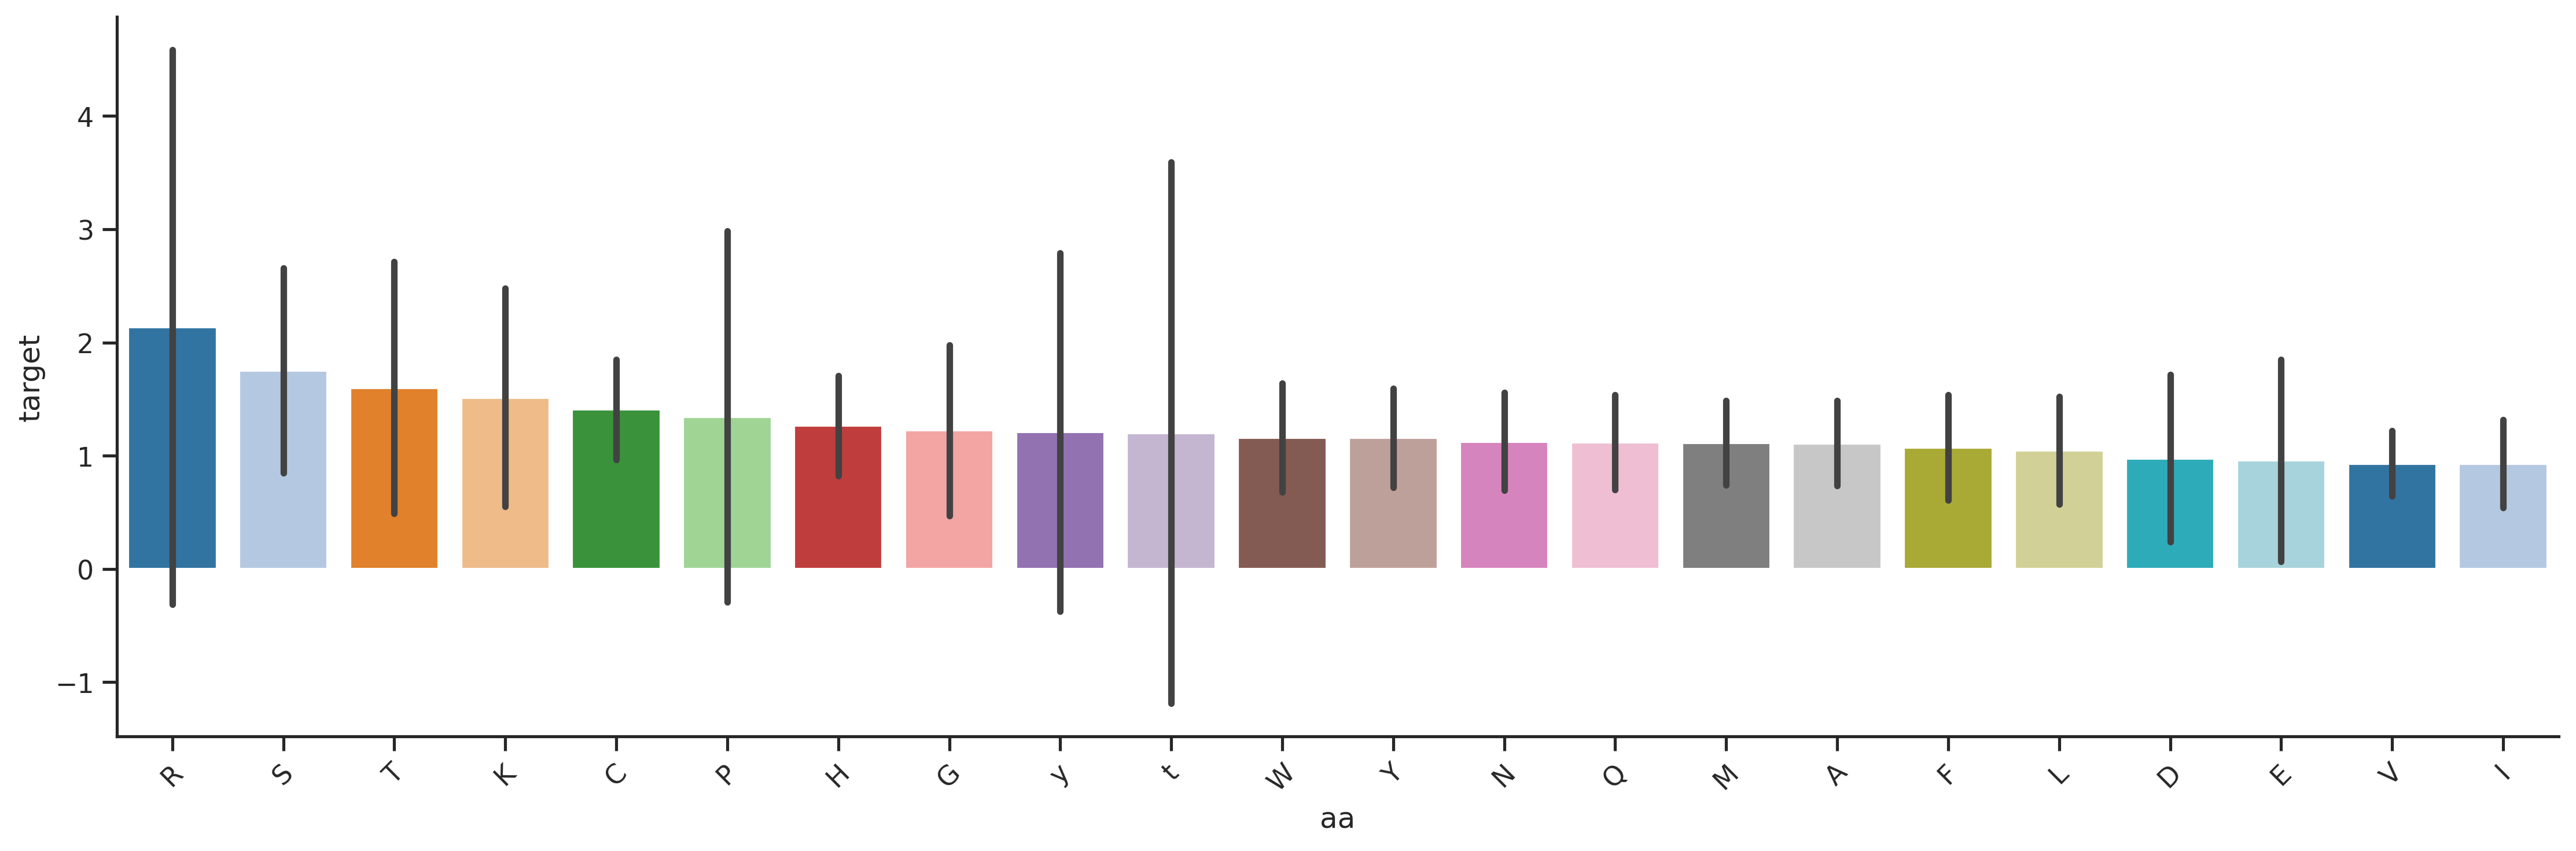

In [ ]:
plot_bar(us_y,'target','aa', circle=False)

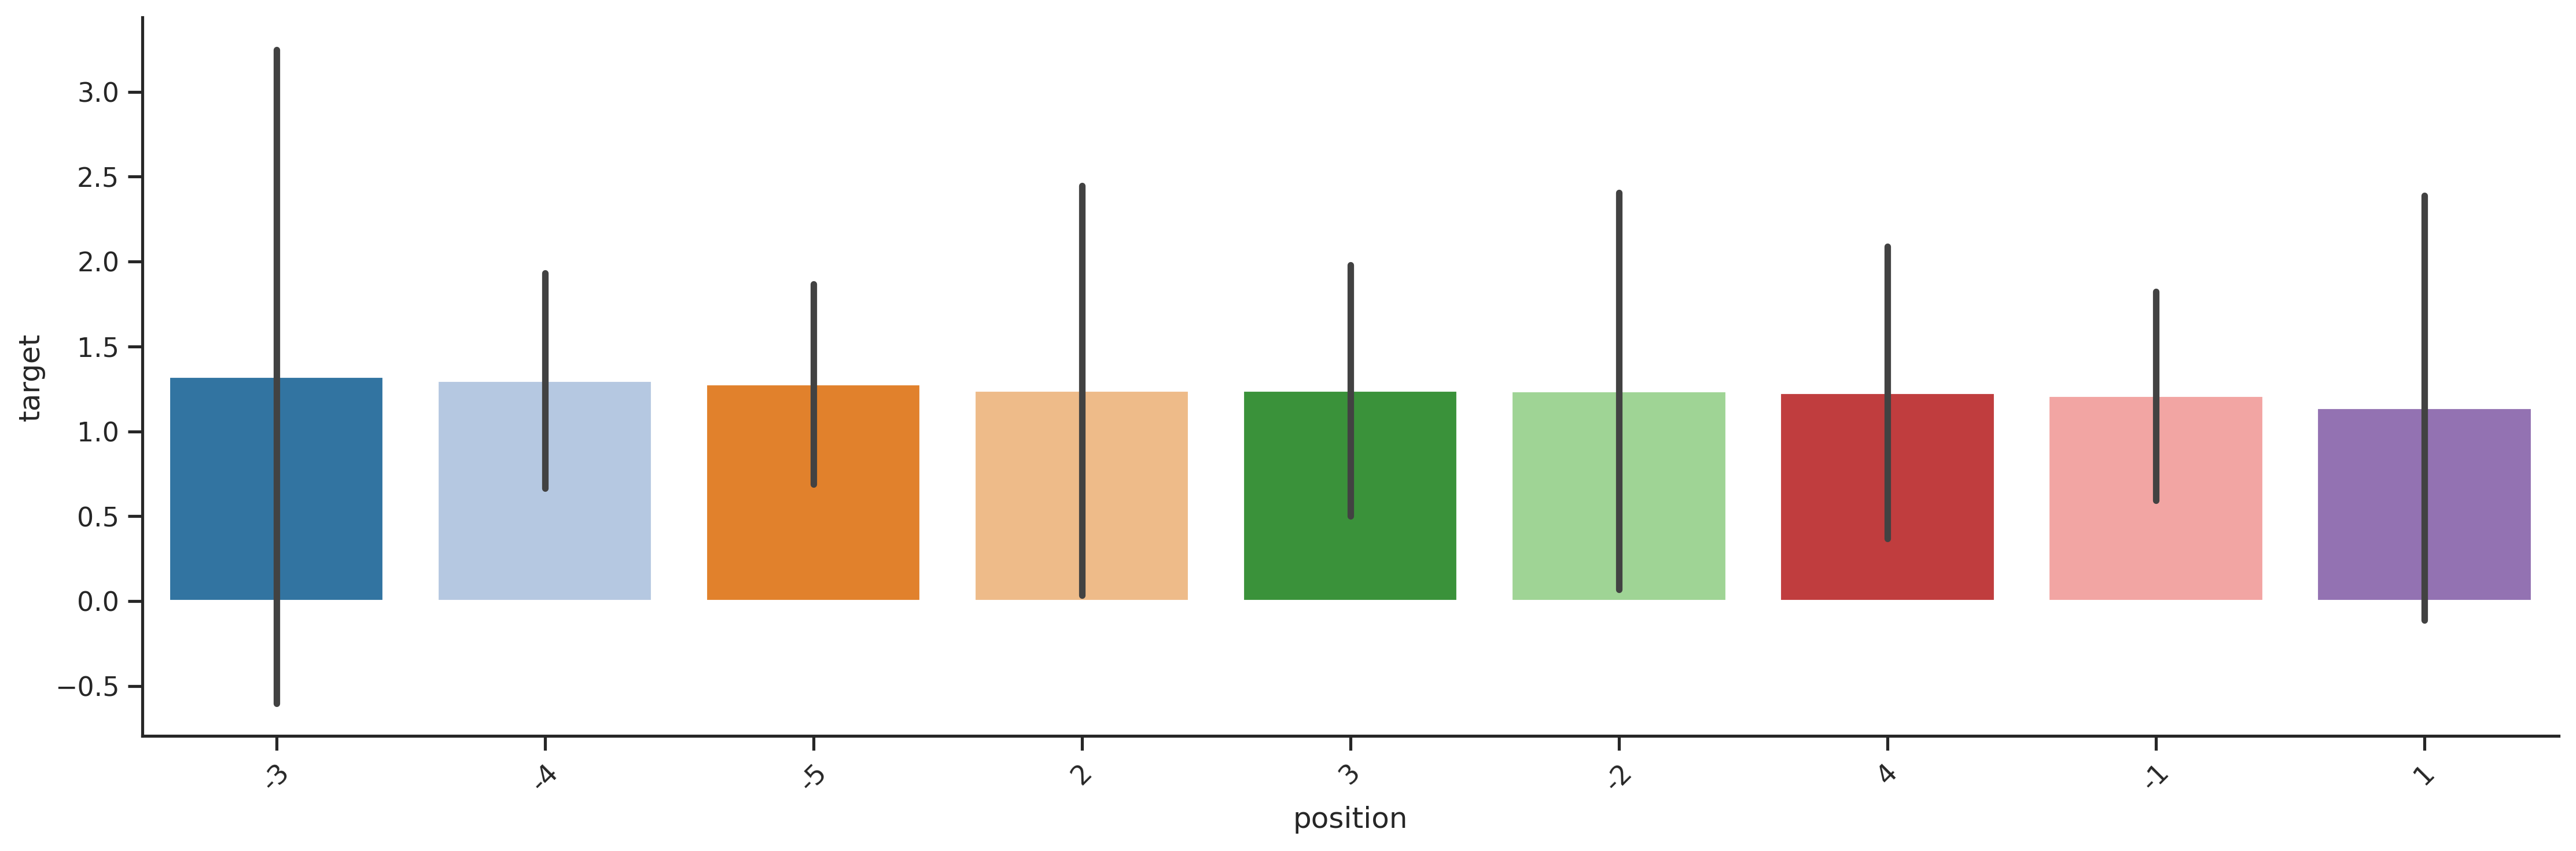

In [ ]:
plot_bar(us_y,'target','position', circle=False)